In [1]:
import numpy as np
import pandas as pd
import os
import time

os.chdir('../..')
import AstroPack as AP
os.chdir('./hyperparameter_tuning/logg')

from matplotlib import rc
rc('text', usetex=True)

from sklearn.model_selection import train_test_split

%matplotlib inline

# Getting the data

In [3]:
# Create a list of the columns that will be used
ColumnList = ['TILE_ID', 'NUMBER', 'combined_logg'] + AP.Filters['JPLUS'] + AP.Filters['WISE']

# Import the full dataframe with stars that have both JPLUS, WISE and LAMOST data
os.chdir('../../data')
StarsRaw = pd.read_csv('STEPEs Input Data.csv', usecols=ColumnList)
os.chdir('../hyperparameter_tuning/logg')

# Drop any row with missing values from the dataframe
StarsRaw = StarsRaw.dropna()

# Convert it into a dataframe with magnitudes and colors, indexed by the TILE ID and NUMBER of the star
StarsRaw, Stars = AP.AssembleWorkingDF(StarsRaw, addWISE=True, addGAIA = False, addGALEX=False, Colors=True, Combinations=False)

In [4]:
logg = StarsRaw['combined_logg']

In [5]:
Stars

,uJAVA,J0378,J0395,J0410,J0430,gSDSS,J0515,rSDSS,J0660,iSDSS,...,(zSDSS - W1),(zSDSS - W2),(zSDSS - W3),(zSDSS - W4),(W1 - W2),(W1 - W3),(W1 - W4),(W2 - W3),(W2 - W4),(W3 - W4)
ID NUMBER,,,,,,,,,,,,,,,,,,,,,
"74970, 27876",18.510300,18.677572,18.294348,17.746620,17.765726,17.364323,17.211205,16.937682,16.895009,16.813219,...,1.427427,1.397427,3.777427,7.645427,-0.030000,2.350000,6.218000,2.380000,6.248000,3.868000
"74970, 28786",18.681479,18.260496,18.225178,17.770169,17.802049,17.491011,17.346547,17.151969,17.139990,17.101623,...,1.308205,0.917206,4.230206,7.853205,-0.390999,2.922001,6.545000,3.313000,6.935999,3.622999
"74970, 22231",18.442708,18.168748,18.165806,17.697921,17.638708,17.342219,17.271138,17.061790,17.088039,16.994983,...,1.268077,1.166077,4.333077,7.652077,-0.102000,3.065000,6.384000,3.167000,6.486000,3.319000
"74970, 25105",18.334427,18.029652,18.009411,17.662632,17.488697,17.311178,17.211997,17.036282,17.053552,16.970657,...,1.161751,0.985752,4.227751,7.675752,-0.175999,3.066000,6.514001,3.241999,6.690000,3.448001
"74970, 25815",16.499126,16.210025,16.135031,15.683990,15.634652,15.421811,15.299540,15.126609,15.124688,15.053313,...,1.255060,1.169061,2.227060,5.616060,-0.085999,0.972000,4.361000,1.058000,4.447000,3.389000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"63487, 15250",17.036599,16.638777,16.665518,16.121685,16.088707,15.767068,15.659821,15.401905,15.388118,15.297113,...,1.414089,1.353089,2.510089,6.425089,-0.061000,1.096000,5.011000,1.157000,5.072000,3.915000
"63487, 4099",14.855529,14.536378,14.400999,14.044807,13.980539,13.806083,13.727394,13.612124,13.624944,13.586199,...,1.195371,1.189371,1.152371,4.891371,-0.006000,-0.043000,3.696000,-0.037000,3.702001,3.739000
"63487, 7893",15.701442,15.564832,15.385651,14.716053,14.613263,14.208155,14.081196,13.762161,13.723630,13.655106,...,1.408605,1.361605,1.700605,5.043604,-0.047000,0.292000,3.634999,0.339000,3.681999,3.342999


In [6]:
logg

ID NUMBER
74970, 27876    3.846
74970, 28786    4.393
74970, 22231    4.353
74970, 25105    4.377
74970, 25815    4.253
                ...  
63487, 15250    4.132
63487, 4099     4.191
63487, 7893     4.456
63487, 2312     4.280
63487, 2409     4.099
Name: combined_logg, Length: 186232, dtype: float64

# Random Forest CV - logg

In [7]:
XDevelop, XTest, yDevelop, yTest = train_test_split(Stars, logg, test_size=0.25, random_state=42)

In [8]:
import itertools

n_features = [136]
n_trees = [100]
min_samples_leaf = [10]
max_features = [0.75, 'auto']
criterion = ["mse"]

HPCombinations = [item for item in itertools.product(n_features, n_trees, min_samples_leaf, max_features, criterion)]

In [ ]:
for HPCombination in HPCombinations:
    Metrics = AP.rf_evaluator(HPCombination, XDevelop, yDevelop, n_splits = 5, n_repeats = 3, verbose = 0)
    pd.DataFrame(data=(HPCombination + Metrics)).T.to_csv('rf_logg_tuning.csv', mode='a', index = False, header = False)

# Graphical Analysis

In [2]:
hp_tuning_rf = pd.read_csv('rf_logg_tuning.csv')

x_axis = {'max_features': ['0.25', '0.5', '0.75', 'auto']}
y_axis = {'n_features': [136, 60, 45, 15]}

In [3]:
t_50_l_1_matrix = AP.create_heatmap_matrix(hp_tuning_rf, {'n_trees': 50, 'min_samples_leaf': 1}, x_axis, y_axis, 'R2')
t_100_l_1_matrix = AP.create_heatmap_matrix(hp_tuning_rf, {'n_trees': 100, 'min_samples_leaf': 1}, x_axis, y_axis, 'R2')
t_50_l_10_matrix = AP.create_heatmap_matrix(hp_tuning_rf, {'n_trees': 50, 'min_samples_leaf': 10}, x_axis, y_axis, 'R2')
t_100_l_10_matrix = AP.create_heatmap_matrix(hp_tuning_rf, {'n_trees': 100, 'min_samples_leaf': 10}, x_axis, y_axis, 'R2')

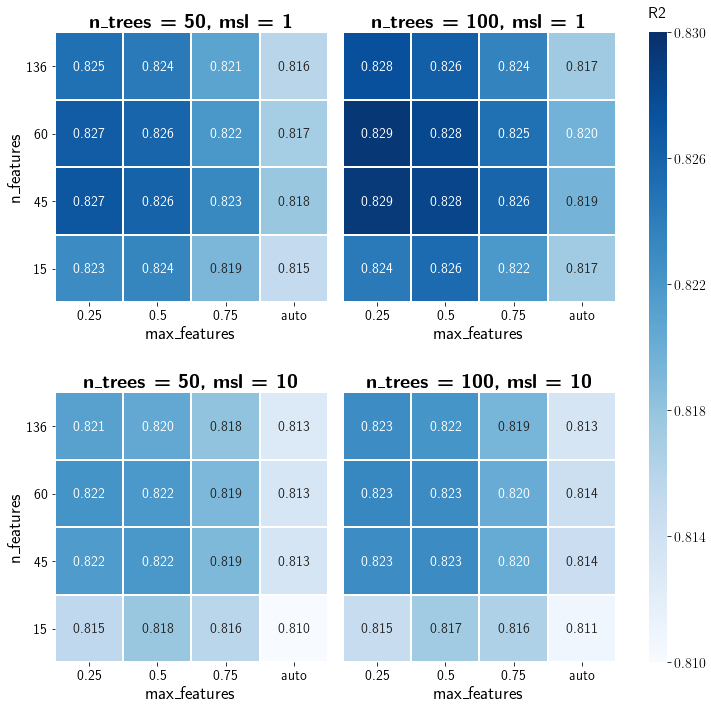

In [5]:
figure = AP.plot_heatmaps(t_50_l_1_matrix, r'\textbf{n\_trees = 50, msl = 1}',  
                          t_50_l_10_matrix, r'\textbf{n\_trees = 50, msl = 10}',
                          t_100_l_1_matrix, r'\textbf{n\_trees = 100, msl = 1}',
                          t_100_l_10_matrix, r'\textbf{n\_trees = 100, msl = 10}', 
                          value_format = '.3f', cmap = 'Blues', v_min = 0.81, v_max = 0.83, 
                          colorbar_label='R2', colorbar_ticks = 6)

figure.savefig('rf_logg_R2_heatmap.jpg', dpi = 250)

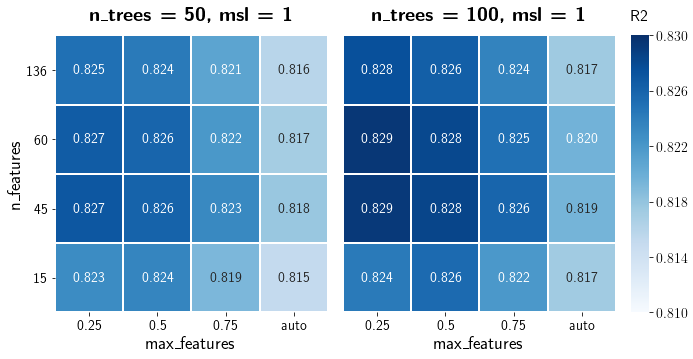

In [6]:
figure = AP.plot_heatmaps_single_line(t_50_l_1_matrix, r'\textbf{n\_trees = 50, msl = 1}',
                                      t_100_l_1_matrix, r'\textbf{n\_trees = 100, msl = 1}',
                                      value_format = '.3f', cmap = 'Blues', v_min = 0.81, v_max = 0.83, 
                                      colorbar_label='R2', colorbar_ticks = 6)

figure.savefig('rf_logg_R2_heatmap (msl = 1).jpg', dpi = 250)

In [8]:
t_50_l_1_matrix = AP.create_heatmap_matrix(hp_tuning_rf, {'n_trees': 50, 'min_samples_leaf': 1}, x_axis, y_axis, 'Time').astype(int)
t_100_l_1_matrix = AP.create_heatmap_matrix(hp_tuning_rf, {'n_trees': 100, 'min_samples_leaf': 1}, x_axis, y_axis, 'Time').astype(int)
t_50_l_10_matrix = AP.create_heatmap_matrix(hp_tuning_rf, {'n_trees': 50, 'min_samples_leaf': 10}, x_axis, y_axis, 'Time').astype(int)
t_100_l_10_matrix = AP.create_heatmap_matrix(hp_tuning_rf, {'n_trees': 100, 'min_samples_leaf': 10}, x_axis, y_axis, 'Time').astype(int)

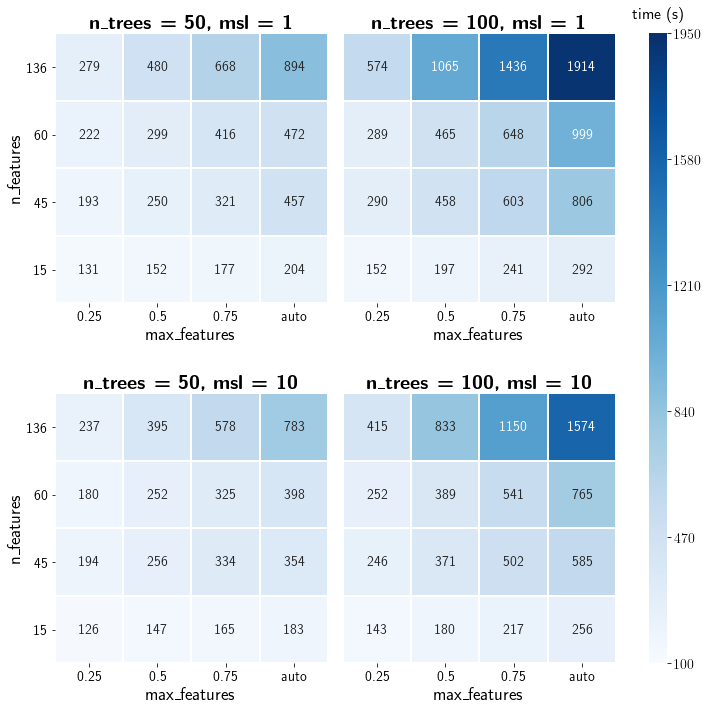

In [13]:
figure = AP.plot_heatmaps(t_50_l_1_matrix, r'\textbf{n\_trees = 50, msl = 1}',  
                          t_50_l_10_matrix, r'\textbf{n\_trees = 50, msl = 10}',
                          t_100_l_1_matrix, r'\textbf{n\_trees = 100, msl = 1}',
                          t_100_l_10_matrix, r'\textbf{n\_trees = 100, msl = 10}', 
                          value_format = 'd', cmap = 'Blues', v_min = 100, v_max = 1950,
                          colorbar_label='time (s)', colorbar_ticks = 6)

figure.savefig('rf_logg_time_heatmap.jpg', dpi = 250)

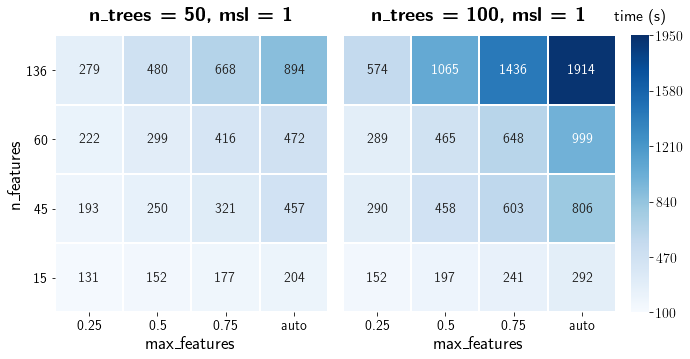

In [14]:
figure = AP.plot_heatmaps_single_line(t_50_l_1_matrix, r'\textbf{n\_trees = 50, msl = 1}',
                                      t_100_l_1_matrix, r'\textbf{n\_trees = 100, msl = 1}',
                                      value_format = 'd', cmap = 'Blues', v_min = 100, v_max = 1950,
                                      colorbar_label='time (s)', colorbar_ticks = 6)

figure.savefig('rf_logg_time_heatmap (msl = 1).jpg', dpi = 250)